In [1]:
#WASTE MANAGEMENT USING CNN  MODEL


In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sequential

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [9]:
pip install cvtColor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cvtColor (from versions: none)
ERROR: No matching distribution found for cvtColor


In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [12]:
pip install category

Note: you may need to restart the kernel to use updated packages.


In [13]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [14]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"


In [15]:
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [16]:
#visualization
from cv2 import cvtColor
x_data= [] 
y_data= []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [01:09<00:00, 144.73it/s]


In [ ]:
color=['#aoe3d5','#6e56ce']
plt.pie(data.label.value_counts(),labels=['(organic)','(recyclable)'],autopct='%0.2f%%',startangle=180,explode=[0.04,0.04])
plt.show()

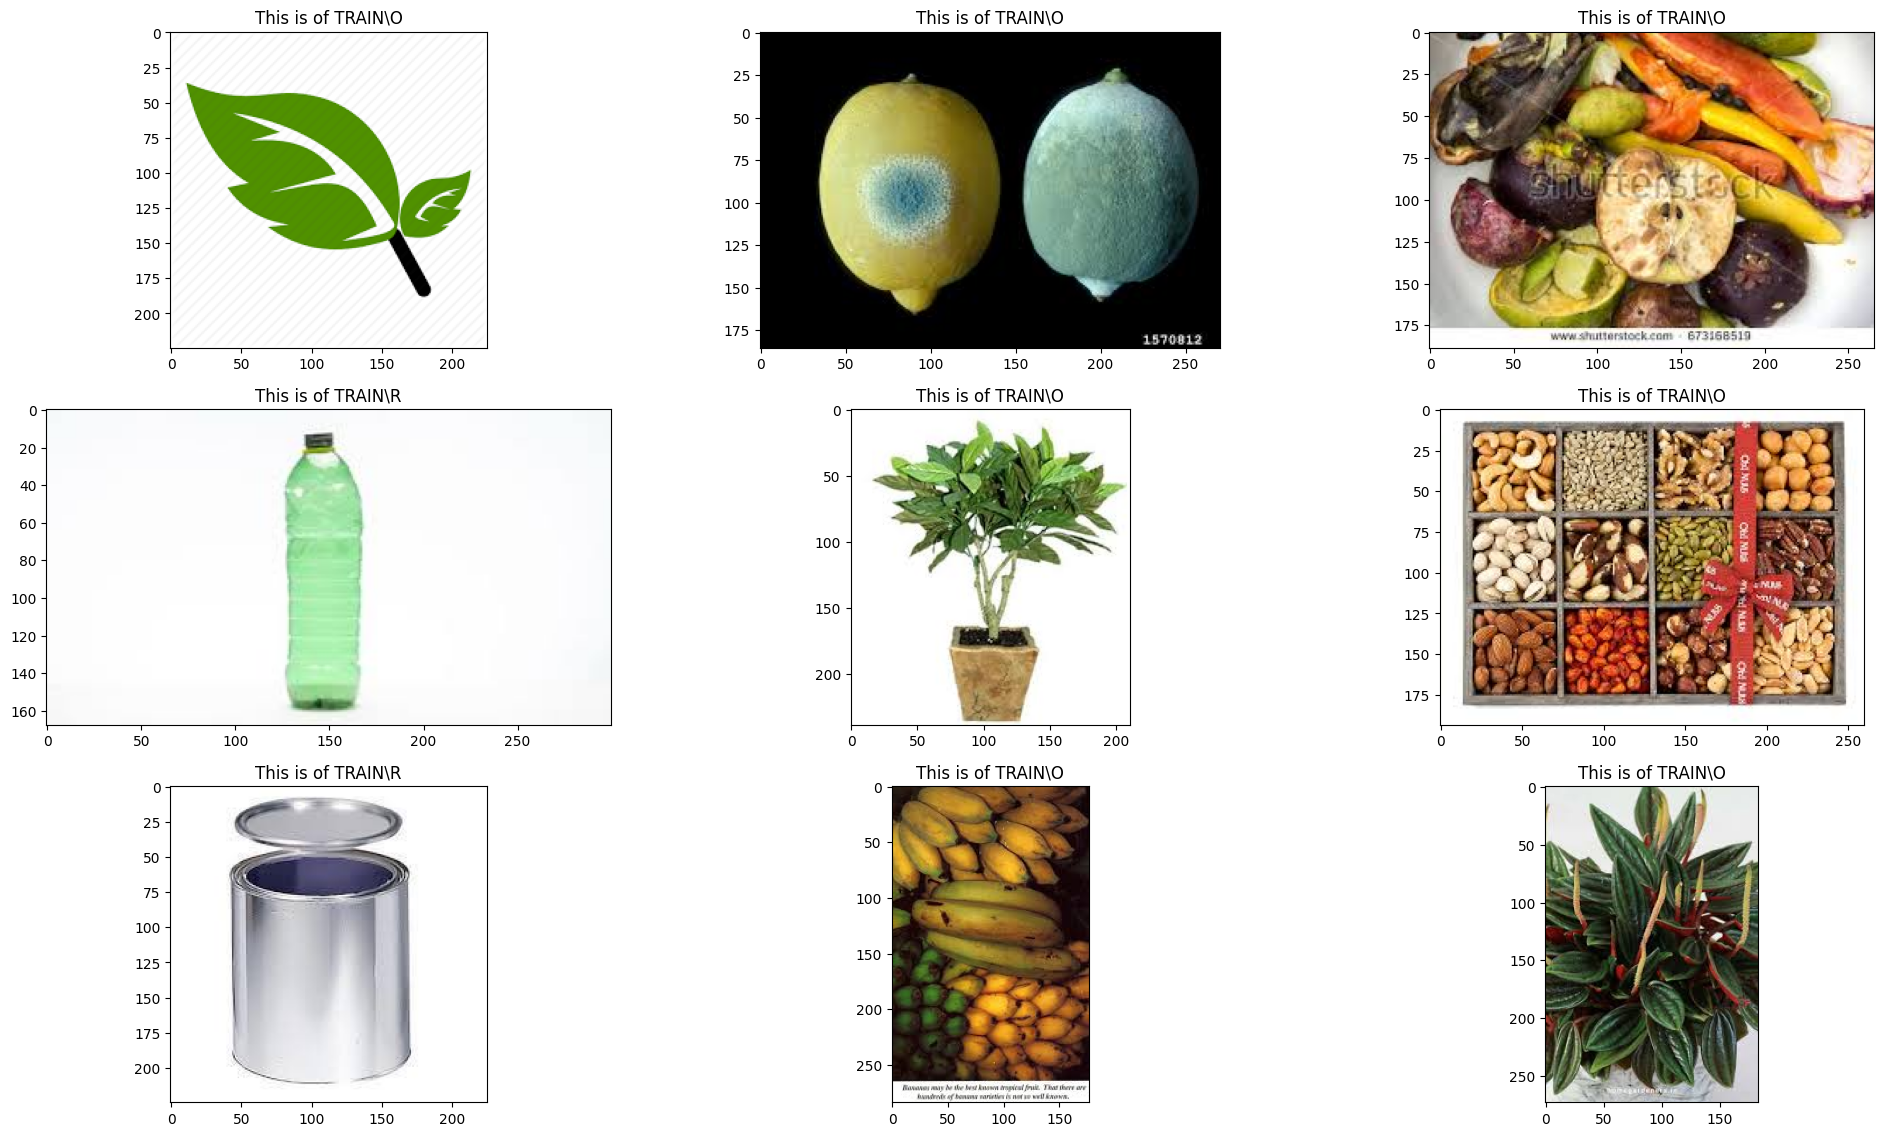

In [18]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [22]:
model = sequential()
model.add(Conv2D(32,(3,3)),input_shape(224,224,2))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation(sigmoid))

model.compile(loss="binary_crossentropy"),
              optimizer="adam",
              metrices=["accuracy"])
batch_size=256

IndentationError: unexpected indent (2654856736.py, line 31)